In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [4]:
plt.rc('font', family='Malgun Gothic')

%matplotlib inline

In [5]:
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

### Gradient Boosting

In [19]:
# 데이터를 불러온다
df_raw = pd.read_csv("C:/Users/jm122/Downloads/3. Big Data 분석/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [20]:
# dataset의 결측치와 데이터타입을 확인한다.
# 결측치가 없으므로, 다음 작업으로 넘어간다.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
BAD        3748 non-null int64
LOAN       3748 non-null int64
MORTDUE    3748 non-null int64
VALUE      3734 non-null float64
REASON     3748 non-null object
JOB        3667 non-null object
YOJ        3543 non-null float64
DEROG      3748 non-null int64
DELINQ     3718 non-null float64
CLAGE      3711 non-null float64
NINQ       3692 non-null float64
CLNO       3748 non-null int64
DEBTINC    3748 non-null float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [21]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [22]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [25]:
# train, validation, test dataset으로 분류한다.
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]
# 7:3 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                               df_raw_y,
                                                               test_size = 0.3,
                                                               random_state=1234)

In [26]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.992
Accuracy on test set: 0.944


C:\Users\jm122\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [36]:
# n_estimators
train_accuracy = []; test_accuracy = []

# para_n_tree = [n_tree*10 for n_tree in range(1, 16)]
para_n_tree = [n_tree for n_tree in range(40, 60)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,validAccuracy
0,40,1.0,0.946
1,41,1.0,0.947
2,42,1.0,0.945
3,43,1.0,0.946
4,44,1.0,0.944
5,45,1.0,0.944
6,46,1.0,0.943
7,47,1.0,0.945
8,48,1.0,0.944
9,49,1.0,0.947


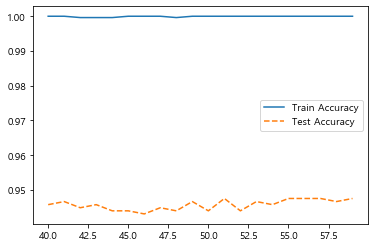

In [37]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [35]:
oob_error = []

for v_n_estimators in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimators, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

C:\Users\jm122\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jm122\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\jm122\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jm122\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\jm122\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably me

KeyboardInterrupt: 

In [ ]:
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob_error")
plt.xlabel("n_estimators")
plt.legend()

In [43]:
# n_estimators
train_accuracy = []; test_accuracy = []

# para_depth = [depth for depth in range(1, 16)]
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(n_estimators=51, max_depth=v_max_depth ,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["validAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,depth,TrainAccuracy,validAccuracy
0,1,0.908,0.908
1,2,0.911,0.910
2,3,0.932,0.928
3,4,0.933,0.929
4,5,0.939,0.930
5,6,0.940,0.930
6,7,0.943,0.934
7,8,0.948,0.936
8,9,0.948,0.935
9,10,0.955,0.938


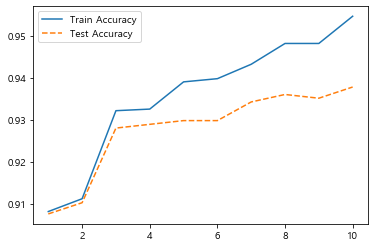

In [46]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [48]:
# n_estimators
train_accuracy = []; test_accuracy = []

# para_split = [split for split in range(1, 16)]
para_split = [split * 10 for split in range(1, 11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(n_estimators=51, max_depth=5, min_samples_split=v_min_samples_split, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["split"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["validAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,split,TrainAccuracy,validAccuracy
0,10,0.937,0.930
1,20,0.933,0.930
2,30,0.933,0.930
3,40,0.933,0.930
4,50,0.933,0.930
5,60,0.932,0.929
6,70,0.932,0.929
7,80,0.932,0.929
8,90,0.932,0.928
9,100,0.932,0.928


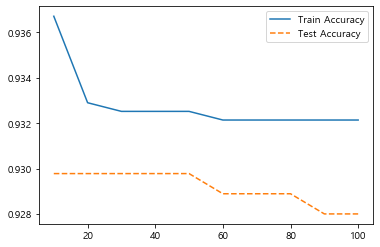

In [49]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [51]:
# n_estimators
train_accuracy = []; test_accuracy = []

# para_leaf = [leaf for leaf in range(1, 16)]
para_leaf = [leaf * 10 for leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(n_estimators=51, max_depth=5, min_samples_split=40, min_samples_leaf=v_min_samples_leaf, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["leaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["validAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,leaf,TrainAccuracy,validAccuracy
0,10,0.933,0.929
1,20,0.927,0.925
2,30,0.926,0.924
3,40,0.921,0.920
4,50,0.908,0.908
5,60,0.908,0.908
6,70,0.908,0.908
7,80,0.908,0.908
8,90,0.908,0.908
9,100,0.908,0.908


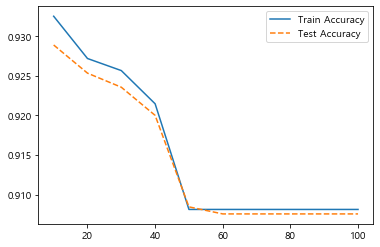

In [52]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [53]:
# 최종 모델
rf_final = RandomForestClassifier(n_estimators=51, max_depth=5, min_samples_split=40, min_samples_leaf=20, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [54]:
y_pred = rf_final.predict(df_test_x)
print("Accuracy: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.925

Confusion matrix: 
[[1021    0]
 [  84   20]]


In [55]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.502
5,DELINQ,0.170
6,CLAGE,0.066
4,DEROG,0.053
7,NINQ,0.050
8,CLNO,0.049
2,VALUE,0.038
0,LOAN,0.035
1,MORTDUE,0.013
3,YOJ,0.011


Text(0, 0.5, '설명변수')

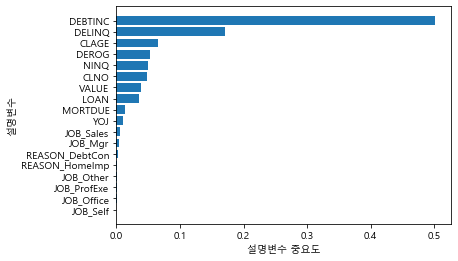

In [56]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

##### 실습

In [59]:
import warnings

warnings.filterwarnings("ignore")

In [65]:
# 데이터를 불러온다
df_raw = pd.read_csv("C:/Users/jm122/Downloads/3. Big Data 분석/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [66]:
del df_raw["CUSTOMER_ID"]

In [67]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 14 columns):
CHURN                 930 non-null object
GENDER                930 non-null object
AGE                   930 non-null int64
CHARGE_TYPE           930 non-null object
HANDSET               930 non-null object
USAGE_BAND            930 non-null object
SERVICE_DURATION      930 non-null float64
DROPPED_CALLS         930 non-null int64
PEAK_CALLS_NO         930 non-null int64
PEAK_CALLS_TIME       930 non-null float64
WEEKEND_CALLS_NO      930 non-null int64
WEEKEND_CALLS_TIME    930 non-null float64
TOTAL_CALLS_NO        930 non-null int64
TOTAL_CALLS_TIME      930 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 101.8+ KB


In [69]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [70]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 14 columns):
CHURN                 930 non-null int32
GENDER                930 non-null object
AGE                   930 non-null int64
CHARGE_TYPE           930 non-null object
HANDSET               930 non-null object
USAGE_BAND            930 non-null object
SERVICE_DURATION      930 non-null float64
DROPPED_CALLS         930 non-null int64
PEAK_CALLS_NO         930 non-null int64
PEAK_CALLS_TIME       930 non-null float64
WEEKEND_CALLS_NO      930 non-null int64
WEEKEND_CALLS_TIME    930 non-null float64
TOTAL_CALLS_NO        930 non-null int64
TOTAL_CALLS_TIME      930 non-null float64
dtypes: float64(4), int32(1), int64(5), object(4)
memory usage: 98.2+ KB


In [71]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
# train, validation, test dataset으로 분류한다.
df_raw_x = df_raw_dummy.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["CHURN"]
# 7:3 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                               df_raw_y,
                                                               test_size = 0.3,
                                                               random_state=1234)

In [74]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.988
Accuracy on test set: 0.867


In [75]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [76]:
# n_estimators
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree*10 for n_tree in range(1, 16)]
# para_n_tree = [n_tree for n_tree in range(40, 60)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,validAccuracy
0,10,0.988,0.867
1,20,0.997,0.878
2,30,1.000,0.896
3,40,1.000,0.896
4,50,1.000,0.903
5,60,1.000,0.896
6,70,1.000,0.910
7,80,1.000,0.910
8,90,1.000,0.907
9,100,1.000,0.910


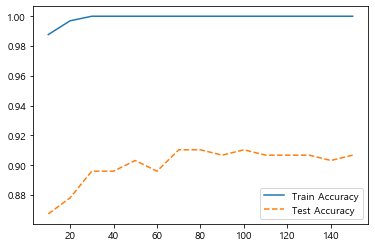

In [77]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [ ]:
oob_error = []

for v_n_estimators in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimators, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

In [ ]:
plt.plot(range(1, 100), oob_error)
plt.ylabel("oob_error")
plt.xlabel("n_estimators")
plt.legend()

In [78]:
# n_estimators
train_accuracy = []; test_accuracy = []

# para_depth = [depth for depth in range(1, 16)]
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(n_estimators=70, max_depth=v_max_depth ,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["validAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,depth,TrainAccuracy,validAccuracy
0,1,0.791,0.842
1,2,0.794,0.846
2,3,0.865,0.867
3,4,0.879,0.871
4,5,0.892,0.889
5,6,0.912,0.910
6,7,0.939,0.907
7,8,0.945,0.903
8,9,0.949,0.903
9,10,0.957,0.903


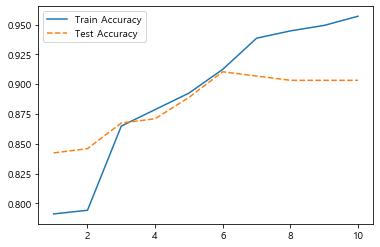

In [79]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [80]:
# n_estimators
train_accuracy = []; test_accuracy = []

# para_split = [split for split in range(1, 16)]
para_split = [split * 10 for split in range(1, 11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(n_estimators=70, max_depth=6, min_samples_split=v_min_samples_split, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["split"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["validAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,split,TrainAccuracy,validAccuracy
0,10,0.897,0.910
1,20,0.892,0.903
2,30,0.889,0.900
3,40,0.882,0.892
4,50,0.879,0.900
5,60,0.874,0.896
6,70,0.876,0.892
7,80,0.876,0.892
8,90,0.871,0.892
9,100,0.871,0.892


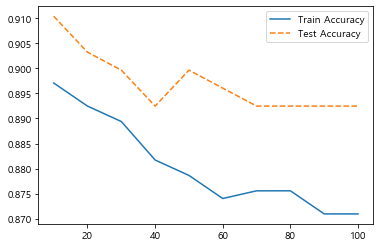

In [81]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [84]:
# n_estimators
train_accuracy = []; test_accuracy = []

# para_leaf = [leaf for leaf in range(1, 16)]
para_leaf = [leaf for leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(n_estimators=70, max_depth=6, min_samples_split=10, min_samples_leaf=v_min_samples_leaf, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["leaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["testAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,leaf,TrainAccuracy,validAccuracy
0,1,0.897,0.910
1,2,0.899,0.907
2,3,0.896,0.903
3,4,0.897,0.903
4,5,0.899,0.903
5,6,0.896,0.900
6,7,0.902,0.900
7,8,0.892,0.903
8,9,0.885,0.896
9,10,0.888,0.889


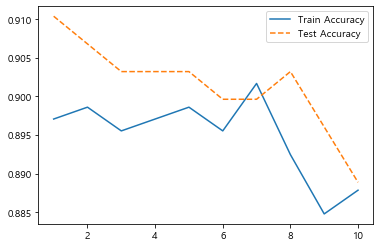

In [85]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [90]:
# 최종 모델
rf_final = RandomForestClassifier(n_estimators=70, max_depth=6, min_samples_split=10, min_samples_leaf=7, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Accuracy on training set: 0.902
Accuracy on test set: 0.900


In [87]:
y_pred = rf_final.predict(df_test_x)
print("Accuracy: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.900

Confusion matrix: 
[[230   5]
 [ 23  21]]


In [88]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.228
2,DROPPED_CALLS,0.162
20,HANDSET_CAS30,0.095
8,TOTAL_CALLS_TIME,0.078
4,PEAK_CALLS_TIME,0.068
3,PEAK_CALLS_NO,0.047
1,SERVICE_DURATION,0.045
0,AGE,0.044
16,HANDSET_ASAD170,0.036
7,TOTAL_CALLS_NO,0.035


Text(0, 0.5, '설명변수')

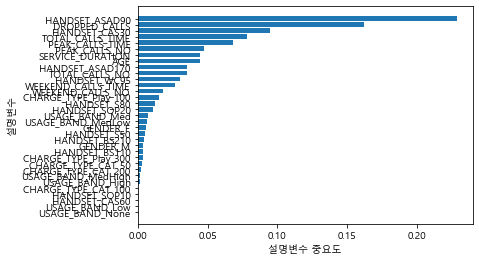

In [89]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
# 데이터를 불러온다
df_raw = pd.read_csv("C:/Users/jm122/Downloads/3. Big Data 분석/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [96]:
# dataset의 결측치와 데이터타입을 확인한다.
# 결측치가 없으므로, 다음 작업으로 넘어간다.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
BAD        3748 non-null int64
LOAN       3748 non-null int64
MORTDUE    3748 non-null int64
VALUE      3734 non-null float64
REASON     3748 non-null object
JOB        3667 non-null object
YOJ        3543 non-null float64
DEROG      3748 non-null int64
DELINQ     3718 non-null float64
CLAGE      3711 non-null float64
NINQ       3692 non-null float64
CLNO       3748 non-null int64
DEBTINC    3748 non-null float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [97]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [98]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [99]:
# train, validation, test dataset으로 분류한다.
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]
# 7:3 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                               df_raw_y,
                                                               test_size = 0.3,
                                                               random_state=1234)

In [102]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.963
Accuracy on test set: 0.941


In [103]:
gb_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [107]:
# learning rate
train_accuracy = []; test_accuracy = []

para_lr = [lr * 0.02 + 0.3 for lr in range(1, 10)]

for v_lr in para_lr:
    gb=GradientBoostingClassifier(learning_rate=v_lr, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["lr"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,lr,TrainAccuracy,TestAccuracy
0,0.32,0.996,0.938
1,0.34,0.997,0.936
2,0.36,0.997,0.938
3,0.38,0.998,0.934
4,0.40,0.999,0.944
5,0.42,0.998,0.938
6,0.44,0.999,0.932
7,0.46,1.000,0.936
8,0.48,1.000,0.938


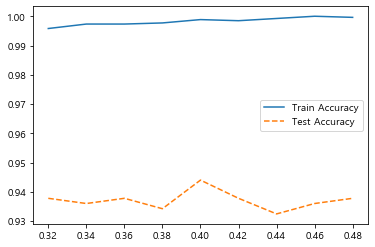

In [108]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [109]:
# n_estimators
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree*10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(learning_rate=0.4, n_estimators=v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,validAccuracy
0,10,0.955,0.932
1,20,0.965,0.935
2,30,0.973,0.937
3,40,0.981,0.938
4,50,0.987,0.939
5,60,0.989,0.940
6,70,0.994,0.942
7,80,0.995,0.941
8,90,0.998,0.942
9,100,0.999,0.944


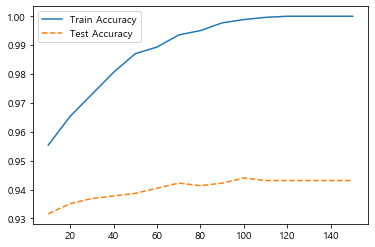

In [110]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [113]:
# depth
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1, 10)]

for v_depth in para_depth:
    gb=GradientBoostingClassifier(learning_rate=0.4, n_estimators=70, max_depth=v_depth, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["depth"] = para_depth
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,depth,TrainAccuracy,validAccuracy
0,1,0.944,0.937
1,2,0.972,0.932
2,3,0.994,0.942
3,4,1.000,0.938
4,5,1.000,0.942
5,6,1.000,0.940
6,7,1.000,0.940
7,8,1.000,0.941
8,9,1.000,0.941


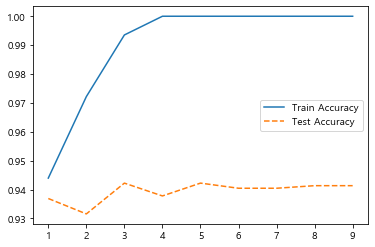

In [114]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [118]:
# min_samples_split
train_accuracy = []; test_accuracy = []

para_split = [s for s in range(35, 45)]

for v_s in para_split:
    gb=GradientBoostingClassifier(learning_rate=0.4, n_estimators=70, max_depth=3, min_samples_split=v_s, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["split"] = para_split
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,split,TrainAccuracy,validAccuracy
0,35,0.989,0.941
1,36,0.989,0.941
2,37,0.990,0.942
3,38,0.989,0.944
4,39,0.989,0.944
5,40,0.989,0.944
6,41,0.989,0.944
7,42,0.991,0.931
8,43,0.991,0.931
9,44,0.990,0.937


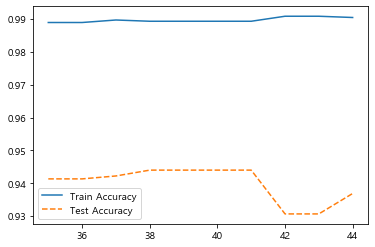

In [119]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [123]:
# min_samples_leaf
train_accuracy = []; test_accuracy = []

para_leaf = [s for s in range(1, 11)]

for v_lf in para_leaf:
    gb=GradientBoostingClassifier(learning_rate=0.4, n_estimators=70, max_depth=3, min_samples_split=40, min_samples_leaf=v_lf, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["leaf"] = para_leaf
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,leaf,TrainAccuracy,validAccuracy
0,1,0.989,0.944
1,2,0.989,0.939
2,3,0.986,0.939
3,4,0.991,0.941
4,5,0.989,0.948
5,6,0.989,0.947
6,7,0.990,0.951
7,8,0.989,0.944
8,9,0.989,0.948
9,10,0.990,0.948


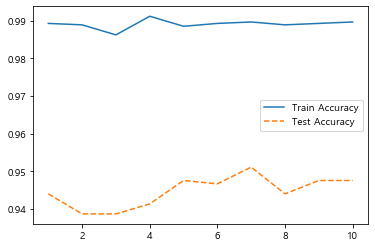

In [124]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [130]:
# 최종 모델
gb_final = GradientBoostingClassifier(learning_rate=0.4, n_estimators=70, max_depth=3, min_samples_split=40, min_samples_leaf=7, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Accuracy on training set: 0.990
Accuracy on test set: 0.951


In [127]:
y_pred = gb_final.predict(df_test_x)
print("Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.951

Confusion matrix: 
[[1017    4]
 [  51   53]]


In [128]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.310
8,CLNO,0.117
6,CLAGE,0.112
5,DELINQ,0.108
2,VALUE,0.085
0,LOAN,0.077
1,MORTDUE,0.054
4,DEROG,0.050
7,NINQ,0.027
3,YOJ,0.025


Text(0, 0.5, '설명변수')

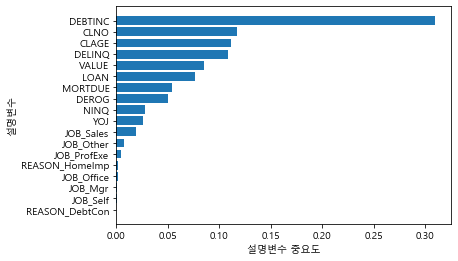

In [129]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 실습

In [131]:
# 데이터를 불러온다
df_raw = pd.read_csv("C:/Users/jm122/Downloads/3. Big Data 분석/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [132]:
del df_raw["CUSTOMER_ID"]

In [133]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 14 columns):
CHURN                 930 non-null object
GENDER                930 non-null object
AGE                   930 non-null int64
CHARGE_TYPE           930 non-null object
HANDSET               930 non-null object
USAGE_BAND            930 non-null object
SERVICE_DURATION      930 non-null float64
DROPPED_CALLS         930 non-null int64
PEAK_CALLS_NO         930 non-null int64
PEAK_CALLS_TIME       930 non-null float64
WEEKEND_CALLS_NO      930 non-null int64
WEEKEND_CALLS_TIME    930 non-null float64
TOTAL_CALLS_NO        930 non-null int64
TOTAL_CALLS_TIME      930 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 101.8+ KB


In [134]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [135]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [136]:
# train, validation, test dataset으로 분류한다.
df_raw_x = df_raw_dummy.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["CHURN"]
# 7:3 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                               df_raw_y,
                                                               test_size = 0.3,
                                                               random_state=1234)

In [138]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.971
Accuracy on test set: 0.885


In [139]:
gb_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [141]:
# learning rate
train_accuracy = []; test_accuracy = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_lr in para_lr:
    gb=GradientBoostingClassifier(learning_rate=v_lr, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["lr"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,lr,TrainAccuracy,TestAccuracy
0,0.1,0.971,0.885
1,0.2,0.998,0.885
2,0.3,1.000,0.892
3,0.4,1.000,0.860
4,0.5,1.000,0.878
5,0.6,1.000,0.882
6,0.7,1.000,0.875
7,0.8,1.000,0.885
8,0.9,1.000,0.853


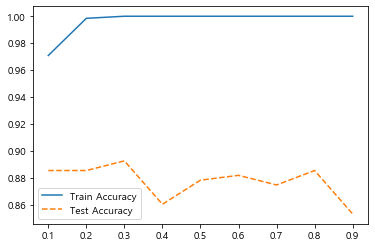

In [142]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [144]:
# n_estimators
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree*10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(learning_rate=0.3, n_estimators=v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,validAccuracy
0,10,0.942,0.885
1,20,0.965,0.896
2,30,0.972,0.892
3,40,0.988,0.892
4,50,0.992,0.892
5,60,0.997,0.892
6,70,0.998,0.892
7,80,1.000,0.889
8,90,1.000,0.892
9,100,1.000,0.889


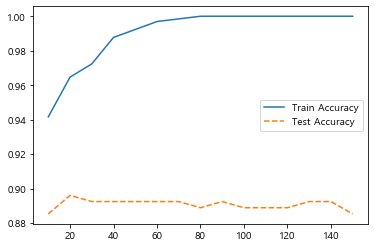

In [145]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [147]:
# depth
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1, 10)]

for v_depth in para_depth:
    gb=GradientBoostingClassifier(learning_rate=0.3, n_estimators=20, max_depth=v_depth, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["depth"] = para_depth
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,depth,TrainAccuracy,validAccuracy
0,1,0.876,0.910
1,2,0.922,0.910
2,3,0.965,0.896
3,4,0.977,0.892
4,5,1.000,0.882
5,6,1.000,0.885
6,7,1.000,0.882
7,8,1.000,0.882
8,9,1.000,0.878


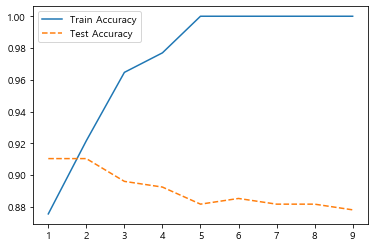

In [148]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [151]:
# min_samples_split
train_accuracy = []; test_accuracy = []

para_split = [s * 10 for s in range(1, 10)]

for v_s in para_split:
    gb=GradientBoostingClassifier(learning_rate=0.3, n_estimators=20, max_depth=2, min_samples_split=v_s, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["split"] = para_split
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,split,TrainAccuracy,validAccuracy
0,10,0.919,0.918
1,20,0.917,0.914
2,30,0.916,0.910
3,40,0.916,0.910
4,50,0.916,0.921
5,60,0.916,0.903
6,70,0.916,0.903
7,80,0.916,0.903
8,90,0.912,0.910


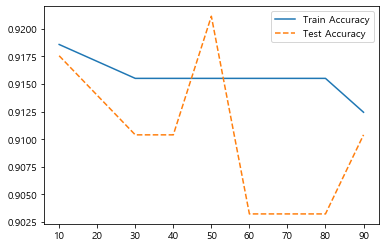

In [152]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [154]:
# min_samples_leaf
train_accuracy = []; test_accuracy = []

para_leaf = [s for s in range(1, 11)]

for v_lf in para_leaf:
    gb=GradientBoostingClassifier(learning_rate=0.3, n_estimators=20, max_depth=2, min_samples_split=30, min_samples_leaf=v_lf, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["leaf"] = para_leaf
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,leaf,TrainAccuracy,validAccuracy
0,1,0.916,0.910
1,2,0.916,0.914
2,3,0.916,0.914
3,4,0.916,0.914
4,5,0.916,0.914
5,6,0.916,0.914
6,7,0.916,0.914
7,8,0.911,0.914
8,9,0.914,0.918
9,10,0.914,0.918


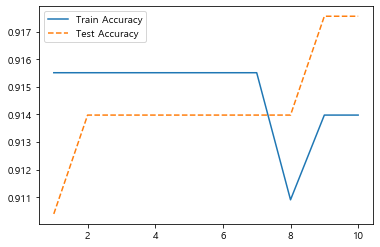

In [155]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [156]:
# 최종 모델
gb_final = GradientBoostingClassifier(learning_rate=0.3, n_estimators=20, max_depth=2, min_samples_split=30, min_samples_leaf=6, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Accuracy on training set: 0.916
Accuracy on test set: 0.914


In [157]:
y_pred = gb_final.predict(df_test_x)
print("Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.914

Confusion matrix: 
[[226   9]
 [ 15  29]]


In [158]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.337
2,DROPPED_CALLS,0.215
20,HANDSET_CAS30,0.133
4,PEAK_CALLS_TIME,0.093
8,TOTAL_CALLS_TIME,0.064
1,SERVICE_DURATION,0.062
0,AGE,0.023
14,CHARGE_TYPE_Play 100,0.016
16,HANDSET_ASAD170,0.012
22,HANDSET_S50,0.009


Text(0, 0.5, '설명변수')

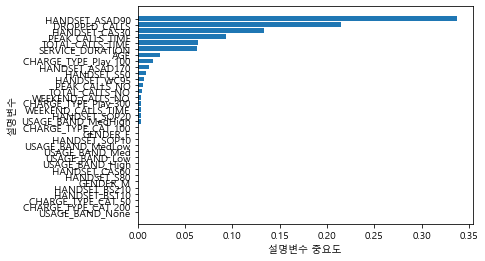

In [159]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### Support Vector machine

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [161]:
# 데이터를 불러온다
df_raw = pd.read_csv("C:/Users/jm122/Downloads/3. Big Data 분석/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [162]:
# dataset의 결측치와 데이터타입을 확인한다.
# 결측치가 없으므로, 다음 작업으로 넘어간다.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
BAD        3748 non-null int64
LOAN       3748 non-null int64
MORTDUE    3748 non-null int64
VALUE      3734 non-null float64
REASON     3748 non-null object
JOB        3667 non-null object
YOJ        3543 non-null float64
DEROG      3748 non-null int64
DELINQ     3718 non-null float64
CLAGE      3711 non-null float64
NINQ       3692 non-null float64
CLNO       3748 non-null int64
DEBTINC    3748 non-null float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [163]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [164]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [165]:
# train, validation, test dataset으로 분류한다.
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]
# 7:3 비율
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                               df_raw_y,
                                                               test_size = 0.3,
                                                               random_state=1234)

In [166]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.908


In [167]:
svm_uncustomized

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1234,
    shrinking=True, tol=0.001, verbose=False)

In [168]:
# C
train_accuracy = []; test_accuracy = []

para_c = [10**c for c in range(-2, 2)]

for v_c in para_c:
    svm=SVC(C=v_c, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["validAccuracy"] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,validAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,1.000,0.908
3,10.00,1.000,0.908


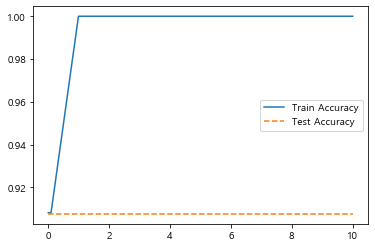

In [169]:
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [170]:
# Gamma
train_accuracy = []; test_accuracy = []

para_g = [10**g for g in range(-2, 2)]

for v_g in para_g:
    svm=SVC(C=0.1, gamma=v_g, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_g = pd.DataFrame()
df_accuracy_g["gamma"] = para_g
df_accuracy_g["TrainAccuracy"] = train_accuracy
df_accuracy_g["validAccuracy"] = test_accuracy
df_accuracy_g.round(3)

,gamma,TrainAccuracy,validAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.908,0.908


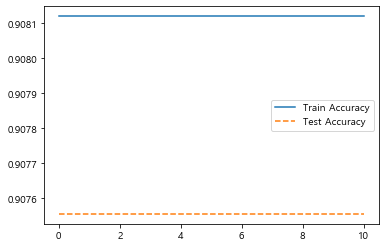

In [171]:
plt.plot(para_g, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_g, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [173]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [176]:
df_strain_x, df_stest_x = train_test_split(df_scaled,
                                           test_size = 0.3,
                                           random_state=1234)

In [179]:
# scaled model(default)
svm_scaled = GradientBoostingClassifier(random_state=1234)
svm_scaled.fit(df_strain_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_strain_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_stest_x, df_test_y)))

Accuracy on training set: 0.963
Accuracy on test set: 0.941


In [199]:
# C
train_accuracy = []; test_accuracy = []

para_c = [10**c for c in range(-2, 2)]

for v_c in para_c:
    svm=SVC(C=v_c, random_state=1234)
    svm.fit(df_strain_x, df_train_y)
    train_accuracy.append(svm.score(df_strain_x, df_train_y))
    test_accuracy.append(svm.score(df_stest_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["validAccuracy"] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,validAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.944,0.935
3,10.00,0.979,0.949


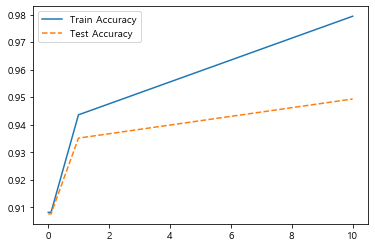

In [200]:
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [201]:
# Gamma
train_accuracy = []; test_accuracy = []

para_g = [10**g for g in range(-3, 2)]

for v_g in para_g:
    svm=SVC(C=1, gamma=v_g, random_state=1234)
    svm.fit(df_strain_x, df_train_y)
    train_accuracy.append(svm.score(df_strain_x, df_train_y))
    test_accuracy.append(svm.score(df_stest_x, df_test_y))
    
df_accuracy_g = pd.DataFrame()
df_accuracy_g["gamma"] = para_g
df_accuracy_g["TrainAccuracy"] = train_accuracy
df_accuracy_g["validAccuracy"] = test_accuracy
df_accuracy_g.round(3)

,gamma,TrainAccuracy,validAccuracy
0,0.001,0.909,0.908
1,0.010,0.923,0.920
2,0.100,0.960,0.942
3,1.000,0.996,0.920
4,10.000,1.000,0.908


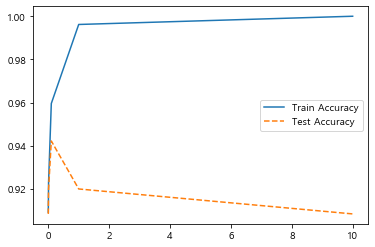

In [202]:
plt.plot(para_g, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_g, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [203]:
# 최종 모델
svm_final = SVC(C=1, gamma=1, random_state=1234)
svm_final.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(svm_final.score(df_strain_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_final.score(df_stest_x, df_test_y)))

Accuracy on training set: 0.908
Accuracy on test set: 0.908


In [204]:
y_pred = svm_final.predict(df_stest_x)
print("Accuracy: {:.3f}\n".format(svm_final.score(df_stest_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.908

Confusion matrix: 
[[1021    0]
 [ 104    0]]


In [ ]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

In [ ]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")